In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def df_dt(x, t, a, b, c, d):
    
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    
    return np.array([dx, dy])

In [3]:
# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01

# Condiciones iniciales
x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)

In [4]:
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

In [6]:
xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

NameError: name 'x' is not defined

NameError: name 'xx' is not defined

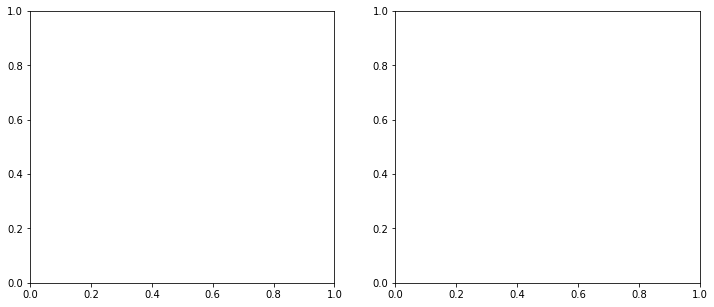

In [5]:
n_max = np.max(solucion) * 1.10

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

ax[0].quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')
plt.savefig('campo_direcciones_ev_temporal.png')